<a href="https://colab.research.google.com/github/Sravani-05/EDA-and-Apache-beam/blob/main/Assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Data Analysis & Data wrangling
import numpy as np
import pandas as pd
import missingno as mn
from collections import Counter

#Visualization
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib.colors import ListedColormap
from matplotlib import cm
import seaborn as sns
%matplotlib inline

#Plotly Libraris
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from IPython.display import display, HTML

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
vgdata = pd.read_csv('/content/drive/MyDrive/Data mining/vgsales.csv')
vgdata.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
#database dimension
print("Database dimension     :",vgdata.shape)
print("Database size          :",vgdata.size)

Database dimension     : (16598, 11)
Database size          : 182578


In [ ]:
#checking numerical columns statistics
vgdata.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
#info about the column types etc. 
vgdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


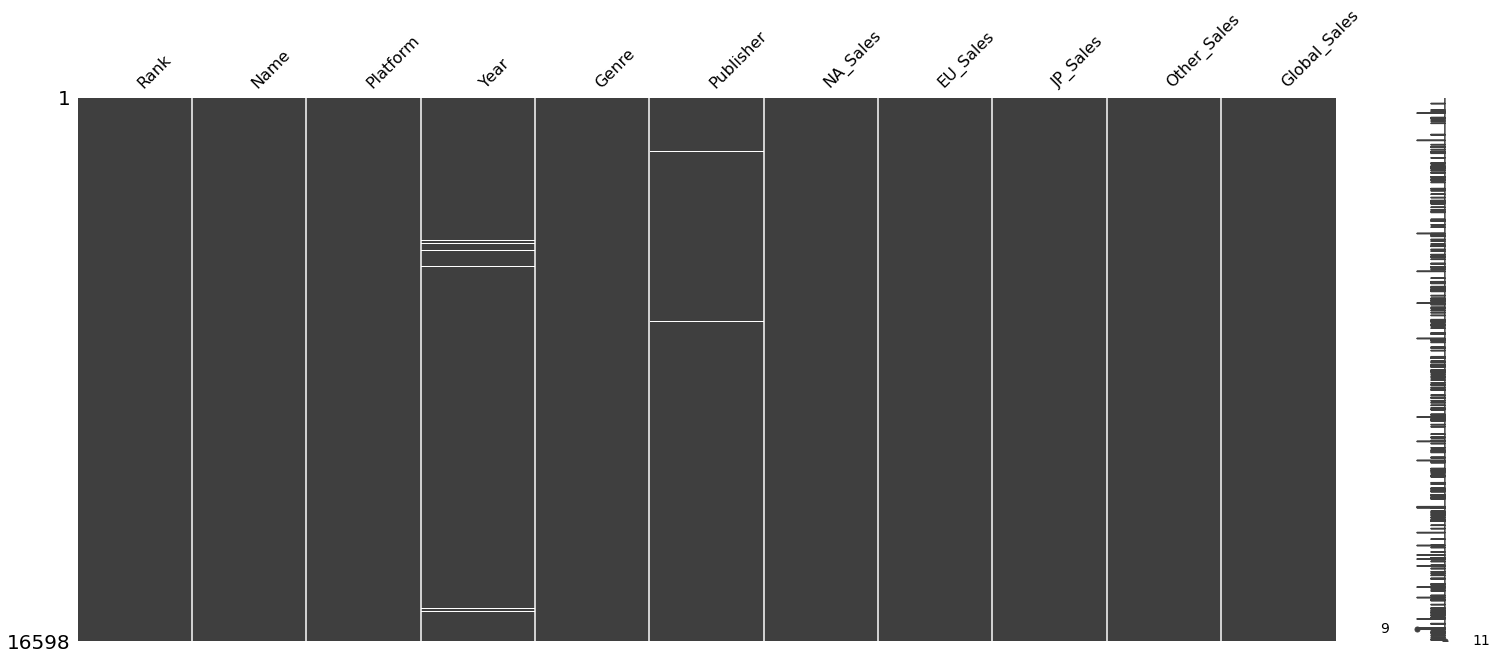

In [ ]:
mn.matrix(vgdata)

In [ ]:
#Column wise null values in train data set 
null_vgd_perc = pd.DataFrame((vgdata.isnull().sum())*100/vgdata.shape[0]).reset_index()
null_vgd_perc.columns = ['Column Name', 'Null Values Percentage']
null_vgd_value = pd.DataFrame(vgdata.isnull().sum()).reset_index()
null_vgd_value.columns = ['Column Name', 'Null Values']
null_vgd = pd.merge(null_vgd_value, null_vgd_perc, on='Column Name')
null_vgd

,Column Name,Null Values,Null Values Percentage
0,Rank,0,0.000000
1,Name,0,0.000000
2,Platform,0,0.000000
3,Year,271,1.632727
4,Genre,0,0.000000
5,Publisher,58,0.349440
6,NA_Sales,0,0.000000
7,EU_Sales,0,0.000000
8,JP_Sales,0,0.000000
9,Other_Sales,0,0.000000


In [ ]:
year_data = vgdata['Year']
print("Max Year Value: ", year_data.max())

Max Year Value:  2020.0


In [ ]:
max_entry = year_data.idxmax()
max_entry = vgdata.iloc[max_entry]
pd.DataFrame(max_entry).T

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29


In [ ]:
vgdata['Year'] = vgdata['Year'].replace(2020.0, 2009.0)
print("Max Year Value: ", year_data.max())

Max Year Value:  2017.0


In [ ]:
game_missedyear = vgdata[vgdata['Year'].isnull()]["Name"].unique()
print("total number of unique games in that missing year is : ",len(game_missedyear))

total number of unique games in that missing year is :  233


In [ ]:
vgdata['Year'] = vgdata['Year'].fillna(2009.0)
vgdata['Year'].isnull().sum()

0

In [ ]:
vgdata['Year']=vgdata['Year'].astype('int')
vgdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  int64  
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [ ]:
print("Total Publisher missing for ", vgdata['Publisher'].isnull().sum(),' rows')

Total Publisher missing for  58  rows


In [ ]:
vgdata = vgdata.dropna()
vgdata.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [8]:
games = vgdata['Name'].unique()
publisher = vgdata['Publisher'].unique()
platforms = vgdata['Platform'].unique()
genres = vgdata['Genre'].unique()

In [9]:
fig = go.Figure()
fig.add_trace(go.Indicator(
    mode = "number",
    value = len(games),
    title = {'text': "Games",'font': {'color': 'gold','size':20}},
    number={'font':{'color': 'gold','size':50}},
    domain = {'row': 0, 'column': 0}
))
fig.add_trace(go.Indicator(
    mode = "number",
    value = len(publisher),
    title = {'text': "Publishers",'font': {'color': 'green','size':20}},
    number={'font':{'color': 'green','size':50}},
    domain = {'row': 0, 'column': 1}
))

fig.add_trace(go.Indicator(
    mode = "number",
    value = len(platforms),
    title = {'text': "Platforms",'font': {'color': 'darkviolet','size':20}},
    number={'font':{'color': 'darkviolet','size':50}},
    domain = {'row': 0, 'column': 2}
))

fig.add_trace(go.Indicator(
    mode = "number",
    value = len(genres),
    title = {'text': "Genres",'font': {'color': 'deepskyblue','size':20}},
    number={'font':{'color': 'deepskyblue','size':50}},
    domain = {'row': 0, 'column': 3}
))

fig.update_layout(
    grid = {'rows': 1, 'columns': 4, 'pattern': "independent"})
fig.show()

In [ ]:
# Video Game Count by Year
yearwisegame =  vgdata.groupby('Year')['Name'].count().reset_index()

In [ ]:
# Yearwise Total Game Sales
fig = go.Figure(go.Bar(x=yearwisesale['Year'],y=yearwisesale['Global_Sales'],
                       marker={'color': yearwisesale['Global_Sales'],'colorscale': 'Viridis'}))
fig.update_layout(title_text='Video Game Global Sales by Release Year',xaxis_title="Year",yaxis_title="Sum of Sales")
fig.show()

In [ ]:
# Video Game Sales by Publisher
pubwisegame =  vgdata.groupby('Publisher')['Name'].count().reset_index()
pubwisegame = pubwisegame.sort_values('Name',ascending=False).reset_index()
pubwisegame.drop("index",axis = 1,inplace=True)

In [ ]:
# Initialize figure
fig = go.Figure()

# Add Traces

fig.add_trace(
    go.Bar(x=pubwisegame['Publisher'][:10],
           y=pubwisegame['Name'][:10],
           name="Top 10",
          marker={'color': pubwisegame['Name'][:10],'colorscale': 'Earth'}))
fig.add_trace(
    go.Bar(x=pubwisegame['Publisher'][:50],
           y=pubwisegame['Name'][:50],
           name="Top 50",
           marker={'color': pubwisegame['Name'][:50],'colorscale': 'Earth'},
           visible=False))
fig.add_trace(
    go.Bar(x=pubwisegame['Publisher'][:100],
           y=pubwisegame['Name'][:100],
           name="Top 100",
           marker={'color': pubwisegame['Name'][:100],'colorscale': 'Earth'},
           visible=False))

fig.add_trace(
    go.Bar(x=pubwisegame['Publisher'][:500],
           y=pubwisegame['Name'][:500],
           name="Top 500",
           marker={'color': pubwisegame['Name'][:500],'colorscale': 'Earth'},
           visible=False))

fig.add_trace(
    go.Bar(x=pubwisegame['Publisher'],
           y=pubwisegame['Name'],
           name="All",
           marker={'color': pubwisegame['Name'],'colorscale': 'Earth'},
               visible=False ))

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.57,
            y=1.2,
            buttons=list([
                dict(label="Top 10",
                     method="update",
                     args=[{"visible": [True, False,False, False, False]},
                           {"title": "Top 10 Publishers"}]),
                dict(label="Top 50",
                     method="update",
                     args=[{"visible": [False,True, False, False, False]},
                           {"title": "Top 50 Publishers"}]),
                dict(label="Top 100",
                     method="update",
                     args=[{"visible": [False,False, True, False, False]},
                           {"title": "Top 100 Publishers"}]),
                dict(label="Top 500",
                     method="update",
                     args=[{"visible": [False,False, False, True, False]},
                           {"title": "Top 500 Publishers"}]),
                dict(label="All",
                     method="update",
                     args=[{"visible": [False,False, False, False, True]},
                           {"title": "All Publishers"}]),
            ]),
        )
    ])

# Set title
fig.update_layout(
    title_text="Publisher Wise Video Game Count",
    xaxis_domain=[0.05, 1.0]
)

fig.show()

In [10]:
# Video Game Sales by Publisher
pubwisegamesale =  vgdata.groupby('Publisher')['Global_Sales'].sum().reset_index()
pubwisegamesale = pubwisegamesale.sort_values('Global_Sales',ascending=False).reset_index()
pubwisegamesale.drop("index",axis = 1,inplace=True)

In [11]:
# Initialize figure
fig = go.Figure()

# Add Traces

fig.add_trace(
    go.Bar(x=pubwisegamesale['Publisher'][:10],
           y=pubwisegamesale['Global_Sales'][:10],
           name="Top 10",
          marker={'color': pubwisegamesale['Global_Sales'][:10],'colorscale': 'Earth'}))

fig.add_trace(
    go.Bar(x=pubwisegamesale['Publisher'][:50],
           y=pubwisegamesale['Global_Sales'][:50],
           name="Top 50",
           marker={'color': pubwisegamesale['Global_Sales'][:50],'colorscale': 'Earth'},
           visible=False))

fig.add_trace(
    go.Bar(x=pubwisegamesale['Publisher'][:100],
           y=pubwisegamesale['Global_Sales'][:100],
           name="Top 100",
           marker={'color': pubwisegamesale['Global_Sales'][:100],'colorscale': 'Earth'},
           visible=False))

fig.add_trace(
    go.Bar(x=pubwisegamesale['Publisher'][:500],
           y=pubwisegamesale['Global_Sales'][:500],
           name="Top 500",
           marker={'color': pubwisegamesale['Global_Sales'][:500],'colorscale': 'Earth'},
           visible=False))

fig.add_trace(
    go.Bar(x=pubwisegamesale['Publisher'],
           y=pubwisegamesale['Global_Sales'],
           name="All",
           marker={'color': pubwisegamesale['Global_Sales'],'colorscale': 'Earth'},
               visible=False ))

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.57,
            y=1.2,
            buttons=list([
                dict(label="Top 10",
                     method="update",
                     args=[{"visible": [True, False,False, False, False]},
                           {"title": "Top 10 Publishers"}]),
                dict(label="Top 50",
                     method="update",
                     args=[{"visible": [False,True, False, False, False]},
                           {"title": "Top 50 Publishers"}]),
                dict(label="Top 100",
                     method="update",
                     args=[{"visible": [False,False, True, False, False]},
                           {"title": "Top 100 Publishers"}]),
                dict(label="Top 500",
                     method="update",
                     args=[{"visible": [False,False, False, True, False]},
                           {"title": "Top 500 Publishers"}]),
                dict(label="All",
                     method="update",
                     args=[{"visible": [False,False, False, False, True]},
                           {"title": "All Publishers"}]),
            ]),
        )
    ])

# Set title
fig.update_layout(
    title_text="Publisher Wise Video Game Sales",
    xaxis_domain=[0.05, 1.0]
)

fig.show()


In [ ]:
top_5_publishers = ['Nintendo', 'Sony Computer Entertainment','Microsoft Game Studios','Konami Digital Entertainment','Electronic Arts']
perc = vgdata.loc[:,["Year","Publisher",'Global_Sales']]
perc['total_sales'] = perc.groupby([perc.Publisher,perc.Year])['Global_Sales'].transform('sum')
perc.drop('Global_Sales', axis=1, inplace=True)
perc = perc.drop_duplicates()
perc = perc[(perc['Year']>=2006)]
perc = perc.sort_values("Year",ascending = False)
perc = perc.loc[perc['Publisher'].isin(top_5_publishers)]
perc = perc.sort_values("Year")
fig=px.bar(perc,x='Publisher', y="total_sales", animation_frame="Year", 
           animation_group="Publisher", color="Publisher", hover_name="Publisher",range_y=[0,200])
fig.update_layout(title_text="Top 5 Publisher Game Sale by Year", xaxis_domain=[0.05, 1.0])
fig.show()

In [12]:
EU = vgdata.pivot_table('EU_Sales', columns='Publisher', aggfunc='sum').T
EU = EU.sort_values(by='EU_Sales', ascending=False).iloc[0:5]
EU_publishers = EU.index

JP = vgdata.pivot_table('JP_Sales', columns='Publisher', aggfunc='sum').T
JP = JP.sort_values(by='JP_Sales', ascending=False).iloc[0:5]
JP_publishers = JP.index

NA = vgdata.pivot_table('NA_Sales', columns='Publisher', aggfunc='sum').T
NA = NA.sort_values(by='NA_Sales', ascending=False).iloc[0:5]
NA_publishers = NA.index

Other = vgdata.pivot_table('Other_Sales', columns='Publisher', aggfunc='sum').T
Other = Other.sort_values(by='Other_Sales', ascending=False).iloc[0:5]
Other_publishers = Other.index

Global = vgdata.pivot_table('Global_Sales', columns='Publisher', aggfunc='sum').T
Global = Global.sort_values(by='Global_Sales', ascending=False).iloc[0:5]
Global_publishers = Global.index

In [ ]:
# Initialize figure
fig = go.Figure()

# Add Traces

fig.add_trace(
    go.Bar(y=NA['NA_Sales'],
           x=NA_publishers,
           name="North America",
          marker={'color': NA['NA_Sales'],'colorscale': 'Portland'}))
fig.add_trace(
    go.Bar(y=EU['EU_Sales'],
           x=EU_publishers,
           name="Europe",
           marker={'color': EU['EU_Sales'],'colorscale': 'Portland'},
           visible=False))
fig.add_trace(
    go.Bar(y=JP['JP_Sales'],
           x=JP_publishers,
           name="Japan",
           marker={'color': JP['JP_Sales'],'colorscale': 'Portland'},
           visible=False))

fig.add_trace(
    go.Bar(y=Other['Other_Sales'],
           x=Other_publishers,
           name="Others",
           marker={'color': Other['Other_Sales'],'colorscale': 'Portland'},
           visible=False))

fig.add_trace(
    go.Bar(y=Global['Global_Sales'],
           x=Global_publishers,
           name="Global",
           marker={'color': Global['Global_Sales'],'colorscale': 'Portland'},
               visible=False ))

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.57,
            y=1.2,
            buttons=list([
                dict(label="North America",
                     method="update",
                     args=[{"visible": [True, False,False, False, False]},
                           {"title": "Top 5 Publishers for North America"}]),
                dict(label="Europe",
                     method="update",
                     args=[{"visible": [False,True, False, False, False]},
                           {"title": "Top 5 Publishers for Europe"}]),
                dict(label="Japan",
                     method="update",
                     args=[{"visible": [False,False, True, False, False]},
                           {"title": "Top 5 Publishers for Japan"}]),
                dict(label="Others",
                     method="update",
                     args=[{"visible": [False,False, False, True, False]},
                           {"title": "Top 5 Publishers for Other Region"}]),
                dict(label="Global",
                     method="update",
                     args=[{"visible": [False,False, False, False, True]},
                           {"title": "Top 5 Publishers for Global"}]),
            ]),
        )
    ])

# Set title
fig.update_layout(
    title_text="Top 5 Publishers per region",
    xaxis_domain=[0.05, 1.0]
)

fig.show()

In [13]:
# Video Game Count by Platform
platform_wise_game =  vgdata.groupby('Platform')['Name'].count().reset_index().sort_values("Name",ascending=False)
platform_wise_game = platform_wise_game.reset_index()
platform_wise_game.drop("index",axis = 1,inplace=True)
display()

In [14]:
# Initialize figure
fig = go.Figure()

# Add Traces

fig.add_trace(
    go.Bar(x=platform_wise_game['Platform'][:5],
           y=platform_wise_game['Name'][:5],
           name="Top 5",
          marker={'color': platform_wise_game['Name'][:5],'colorscale': 'Viridis'}))
fig.add_trace(
    go.Bar(x=platform_wise_game['Platform'][:10],
           y=platform_wise_game['Name'][:10],
           name="Top 10",
           marker={'color': platform_wise_game['Name'][:10],'colorscale': 'Viridis'},
           visible=False))
fig.add_trace(
    go.Bar(x=platform_wise_game['Platform'][:20],
           y=platform_wise_game['Name'][:20],
           name="Top 20",
           marker={'color': platform_wise_game['Name'][:20],'colorscale': 'Viridis'},
           visible=False))

fig.add_trace(
    go.Bar(x=platform_wise_game['Platform'],
           y=platform_wise_game['Name'],
           name="All",
           marker={'color': platform_wise_game['Name'],'colorscale': 'Viridis'},
               visible=False ))

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.57,
            y=1.2,
            buttons=list([
                dict(label="Top 5",
                     method="update",
                     args=[{"visible": [True, False,False, False]},
                           {"title": "Top 5 Platforms"}]),
                dict(label="Top 10",
                     method="update",
                     args=[{"visible": [False,True, False, False]},
                           {"title": "Top 10 Platforms"}]),
                dict(label="Top 20",
                     method="update",
                     args=[{"visible": [False,False, True,False]},
                           {"title": "Top 20 Platforms"}]),
                dict(label="All",
                     method="update",
                     args=[{"visible": [False,False, False,True]},
                           {"title": "All Platforms"}]),
            ]),
        )
    ])

# Set title
fig.update_layout(
    title_text="Platform Wise Video Game Count",
    xaxis_domain=[0.05, 1.0]
)

fig.show()


In [16]:
# Video Game Sale by Platform
platform_wise_gamesale =  vgdata.groupby('Platform')['Global_Sales'].sum().reset_index().sort_values("Global_Sales",ascending=False)
platform_wise_gamesale = platform_wise_gamesale.reset_index()
platform_wise_gamesale.drop("index",axis = 1,inplace=True)

In [ ]:
# Video Game Sales by Platform
# Initialize figure
fig = go.Figure()

# Add Traces

fig.add_trace(
    go.Bar(x=platform_wise_gamesale['Platform'][:5],
           y=platform_wise_gamesale['Global_Sales'][:5],
           name="Top 5",
          marker={'color': platform_wise_gamesale['Global_Sales'][:5],'colorscale': 'Viridis'}))
fig.add_trace(
    go.Bar(x=platform_wise_gamesale['Platform'][:10],
           y=platform_wise_gamesale['Global_Sales'][:10],
           name="Top 10",
           marker={'color': platform_wise_gamesale['Global_Sales'][:10],'colorscale': 'Viridis'},
           visible=False))
fig.add_trace(
    go.Bar(x=platform_wise_gamesale['Platform'][:20],
           y=platform_wise_gamesale['Global_Sales'][:20],
           name="Top 20",
           marker={'color': platform_wise_gamesale['Global_Sales'][:20],'colorscale': 'Viridis'},
           visible=False))

fig.add_trace(
    go.Bar(x=platform_wise_gamesale['Platform'],
           y=platform_wise_gamesale['Global_Sales'],
           name="All",
           marker={'color': platform_wise_gamesale['Global_Sales'],'colorscale': 'Viridis'},
               visible=False ))

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.57,
            y=1.2,
            buttons=list([
                dict(label="Top 5",
                     method="update",
                     args=[{"visible": [True, False,False, False]},
                           {"title": "Top 5 Platforms"}]),
                dict(label="Top 10",
                     method="update",
                     args=[{"visible": [False,True, False, False]},
                           {"title": "Top 10 Platforms"}]),
                dict(label="Top 20",
                     method="update",
                     args=[{"visible": [False,False, True,False]},
                           {"title": "Top 20 Platforms"}]),
                dict(label="All",
                     method="update",
                     args=[{"visible": [False,False, False,True]},
                           {"title": "All Platforms"}]),
            ]),
        )
    ])

# Set title
fig.update_layout(
    title_text="Platform Wise Video Game Sales",
    xaxis_domain=[0.05, 1.0]
)

fig.show()

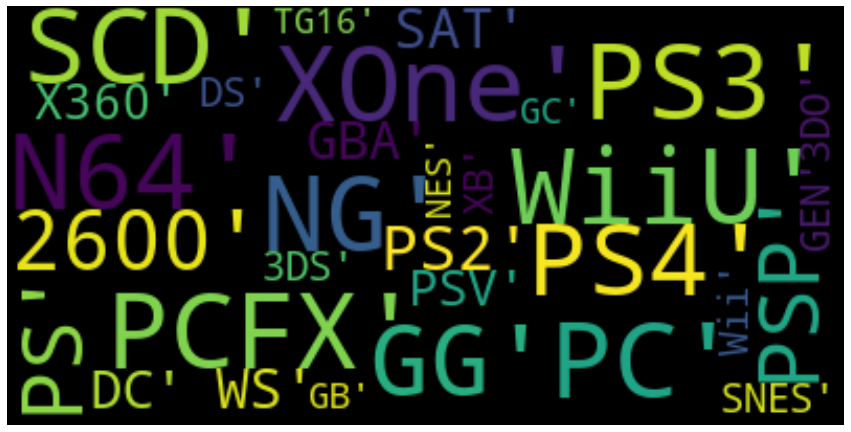

In [ ]:
import plotly.io as pio
pio.renderers.default='colab'
from wordcloud import WordCloud, ImageColorGenerator

text = list(set(vgdata['Platform']))
plt.rcParams['figure.figsize'] = (15,15)
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="black").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()


In [ ]:
import plotly.io as pio
pio.renderers.default='colab'
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=vgdata['NA_Sales'], 
               y=vgdata['Platform'],
               mode='markers',
               name = "North America",
               marker=dict(color='Teal',size=vgdata['NA_Sales'],showscale=True)))
fig.add_trace(
    go.Scatter(x=vgdata['EU_Sales'], 
               y=vgdata['Platform'],
               mode='markers',
               name = "Europe", 
               marker=dict(color='Purple',size=vgdata['EU_Sales'],showscale=True))) 
fig.add_trace(
    go.Scatter(x=vgdata['JP_Sales'], 
               y=vgdata['Platform'],
               mode='markers',
               name = "Japan",
               marker=dict(color='Gold',size=vgdata['JP_Sales'],showscale=True))) 
fig.add_trace(
    go.Scatter(x=vgdata['Other_Sales'], 
               y=vgdata['Platform'],
               mode='markers',
               name = "Other Regions",
               marker=dict(color='Deepskyblue',size=vgdata['Other_Sales'],showscale=True)))    
fig.update_layout(title_text='Region Wise Game Sales by Platform',xaxis_title="Sales in $M",yaxis_title="Platform")    

In [ ]:
# Video Game Count by Genre
genre_wise_game =  vgdata.groupby('Genre')['Name'].count().reset_index().sort_values("Name",ascending=False)
genre_wise_game = genre_wise_game.reset_index()
genre_wise_game.drop("index",axis = 1,inplace=True)
#display()

In [ ]:
fig = go.Figure([go.Pie(labels=genre_wise_game['Genre'], 
                        values=genre_wise_game['Name'],
                        hole=0.3)])  

fig.update_traces(hoverinfo='label+percent+value', 
                  textinfo='percent', 
                  textfont_size=15)
fig.update_layout(title="Genre Wise Game Count",title_x=0.5)
fig.show()

In [ ]:
# Genre wise Game Sales
genre = vgdata.loc[:,['Genre','Global_Sales']]
genre['total_sales'] = genre.groupby('Genre')['Global_Sales'].transform('sum')
genre.drop('Global_Sales', axis=1, inplace=True)
genre = genre.drop_duplicates()

fig = px.pie(genre, names='Genre', values='total_sales', template='seaborn')
fig.update_traces(rotation=90, pull=[0.2,0.06,0.06,0.06,0.06], textinfo="percent+label")
fig.update_layout(title="Genre Wise Game Sales",title_x=0.5)
fig.show()

In [ ]:
# Top 5 Games by Genre

genre_wise_game= vgdata.groupby(['Genre','Name'])['Global_Sales'].sum().reset_index().sort_values(['Genre','Global_Sales'],ascending = (True,False))

In [ ]:
genre = vgdata['Genre'].unique()
genre_s = sorted(genre)
print ("List of Game Genres : " , genre_s)

List of Game Genres :  ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']


In [ ]:
# Top 5 Games per Genre
fig = go.Figure()
for genre in genre_s:
    df = genre_wise_game[genre_wise_game['Genre']==genre]
    fig.add_trace(
        go.Bar(x=df['Name'][:5],
               y=df['Global_Sales'][:5],
               name=genre,
               marker={'color': df['Global_Sales'][:5],'colorscale': 'Electric'}))
    
fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="Action",
                     method="update",
                     args=[{"visible": [True, False, False, False,False, False, False,False, False, False,False, False]},
                           {"title": "Top 5 Games in Action Genre"}]),
                dict(label="Adventure",
                     method="update",
                     args=[{"visible": [False, True, False, False,False, False, False,False, False, False,False, False]},
                           {"title": "Top 5 Games in Adventure Genre"}]),
                dict(label="Fighting",
                     method="update",
                     args=[{"visible": [False, False, True, False,False, False, False,False, False, False,False, False]},
                           {"title": "Top 5 Games in Fighting Genre"}]),
                dict(label="Misc",
                     method="update",
                     args=[{"visible": [False, False, False, True,False, False, False,False, False, False,False, False]},
                           {"title": "Top 5 Games in Misc Genre"}]),
                dict(label="Platform",
                     method="update",
                     args=[{"visible": [False, False, False, False,True, False, False,False, False, False,False, False]},
                           {"title": "Top 5 Games in Platform Genre"}]),
                dict(label="Puzzle",
                     method="update",
                     args=[{"visible": [False, False, False, False,False, True, False,False, False, False,False, False]},
                           {"title": "Top 5 Games in Puzzle Genre"}]),
                dict(label="Racing",
                     method="update",
                     args=[{"visible": [False, False, False, False,False, False, True,False, False, False,False, False]},
                           {"title": "Top 5 Games in Racing Genre"}]),
                dict(label="Role-Playing",
                     method="update",
                     args=[{"visible": [False, False, False, False,False, False, False,True, False, False,False, False]},
                           {"title": "Top 5 Games in Role-Playing Genre"}]),
                dict(label="Shooter",
                     method="update",
                     args=[{"visible": [False, False, False, False,False, False, False,False, True, False,False, False]},
                           {"title": "Top 5 Games in Shooter Genre"}]),
                dict(label="Simulation",
                     method="update",
                     args=[{"visible": [False, False, False, False,False, False, False,False, False, True,False, False]},
                           {"title": "Top 5 Games in Simulation Genre"}]),
                dict(label="Sports",
                     method="update",
                     args=[{"visible": [False, False, False, False,False, False, False,False, False, False,True, False]},
                           {"title": "Top 5 Games in Sport Genre"}]),
                dict(label="Strategy",
                     method="update",
                     args=[{"visible": [False, False, False, False,False, False, False,False, False, False,False, True]},
                           {"title": "Top 5 Games in Strategy Genre"}]),
                
            ]),
        )
    ])
fig.update_layout(title_text="Top 5 Games per Genre")

fig.show()    

In [ ]:
na_sales=[]
eu_sales=[]
jp_sales=[]
other_sales=[]
global_sales=[]
for i in genre_s:
    val=vgdata[vgdata.Genre==i]
    na_sales.append(val.NA_Sales.sum())
    eu_sales.append(val.EU_Sales.sum())
    jp_sales.append(val.JP_Sales.sum())
    other_sales.append(val.Other_Sales.sum())


In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=na_sales,
                     y=genre_s,
                     name='North America Sales',
                     marker_color='teal',
                     orientation='h'))
fig.add_trace(go.Bar(x=eu_sales,
                     y=genre_s,
                     name='Europe Sales',
                     marker_color='purple',
                     orientation='h'))
fig.add_trace(go.Bar(x=jp_sales,
                     y=genre_s,
                     name='Japan Sales',
                     marker_color='gold',
                     orientation='h'))
fig.add_trace(go.Bar(x=other_sales,
                     y=genre_s,
                     name='Other Region Sales',
                     marker_color='deepskyblue',
                     orientation='h'))
fig.update_layout(title_text='Region Wise Game Sales by Genre',xaxis_title="Sales in $M",yaxis_title="Genre",
                  barmode='stack')
fig.show()

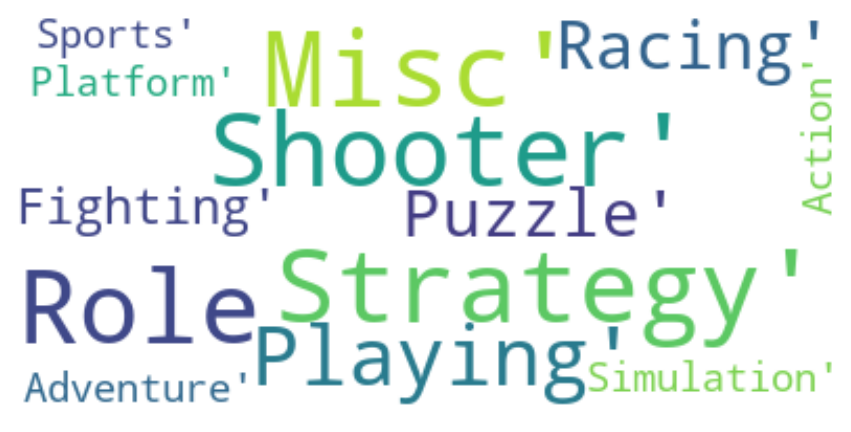

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = list(set(vgdata['Genre']))
plt.rcParams['figure.figsize'] = (15,15)
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
publisher_genre= vgdata.groupby(['Genre','Publisher'])['Name'].count().reset_index()

In [ ]:
fig = px.scatter(publisher_genre, x="Publisher", y="Name", color='Genre')

fig.update_layout(title='Genre wise Game count per Publisher',xaxis_title="Publisher",yaxis_title="Game Count")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [ ]:
# Top 5 Videos Generated by Global Sales
EU = vgdata.pivot_table('EU_Sales', columns='Name', aggfunc='sum').T
EU = EU.sort_values(by='EU_Sales', ascending=False).iloc[0:5]
EU_games = EU.index

JP = vgdata.pivot_table('JP_Sales', columns='Name', aggfunc='sum').T
JP = JP.sort_values(by='JP_Sales', ascending=False).iloc[0:5]
JP_games = JP.index

NA = vgdata.pivot_table('NA_Sales', columns='Name', aggfunc='sum').T
NA = NA.sort_values(by='NA_Sales', ascending=False).iloc[0:5]
NA_games = NA.index

Other = vgdata.pivot_table('Other_Sales', columns='Name', aggfunc='sum').T
Other = Other.sort_values(by='Other_Sales', ascending=False).iloc[0:5]
Other_games = Other.index


In [ ]:
# Initialize figure
fig = make_subplots(
    rows=2, cols=2, subplot_titles=("North Americal", "Europe", "Japan","Other"),
    column_widths=[0.5, 0.5],
    row_heights=[0.5, 0.5],
    specs=[[{"type": "bar"}, {"type": "bar"}],
           [ {"type": "bar"}, {"type": "bar"}]])
# Add Traces

fig.add_trace(
    go.Bar(y=NA['NA_Sales'],
           x=NA_games,
           name="North America",
          marker={'color': NA['NA_Sales'],'colorscale': 'Portland'})
         ,row=1, col=1)
fig.add_trace(
    go.Bar(y=EU['EU_Sales'],
           x=EU_games,
           name="Europe",
           marker={'color': EU['EU_Sales'],'colorscale': 'Portland'},
           ),row=1, col=2)
fig.add_trace(
    go.Bar(y=JP['JP_Sales'],
           x=JP_games,
           name="Japan",
           marker={'color': JP['JP_Sales'],'colorscale': 'Portland'},
           ),row=2, col=1)

fig.add_trace(
    go.Bar(y=Other['Other_Sales'],
           x=Other_games,
           name="Other",
           marker={'color': Other['Other_Sales'],'colorscale': 'Portland'},
           ),row=2, col=2)



fig.show()

In [ ]:
# Year wise total sale

perc = vgdata[["Year",'NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
perc[['NA_mean','EU_mean','JP_mean','Other_mean']] = perc.groupby('Year')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].transform('sum')
perc.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'], axis=1, inplace=True)
perc = perc.drop_duplicates()
perc = perc.sort_values("Year")
df = pd.DataFrame({'Place': ['NA_Sales']*perc.shape[0], 'Year':perc['Year'], 'Sales': perc['NA_mean']})
df1 = pd.DataFrame({'Place': ['EU_Sales']*perc.shape[0], 'Year':perc['Year'], 'Sales': perc['EU_mean']})
df2 = pd.DataFrame({'Place': ['JP_Sales']*perc.shape[0], 'Year':perc['Year'], 'Sales': perc['JP_mean']})
df3 = pd.DataFrame({'Place': ['Other_Sales']*perc.shape[0], 'Year':perc['Year'], 'Sales': perc['Other_mean']})
final = pd.concat([df,df1,df2,df3], axis=0)
final = final.sort_values("Year")
fig=px.bar(final,x='Place', y="Sales", animation_frame="Year",animation_group="Place", color="Place", hover_name="Place",range_y=[0,150])
fig.update_layout(title="Year Wise Total Sale",title_x=0.5)
fig.show()

In [ ]:
df = vgdata.loc[:,['Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
df[['NA_sum','EU_sum','JP_sum','Other_sum', 'Global_sum']] = df.groupby('Year')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].transform('sum')
df.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'], axis=1, inplace=True)
df = df.drop_duplicates()
df = df.sort_values('Year')
df1 = pd.DataFrame({'Place': ['NA_Sales']*df.shape[0], 'Year':df['Year'], 'Sales': df['NA_sum'], 'Global_Sales': df['Global_sum']})
df2 = pd.DataFrame({'Place': ['EU_Sales']*df.shape[0], 'Year':df['Year'], 'Sales': df['EU_sum'], 'Global_Sales': df['Global_sum']})
df3 = pd.DataFrame({'Place': ['JP_Sales']*df.shape[0], 'Year':df['Year'], 'Sales': df['JP_sum'], 'Global_Sales': df['Global_sum']})
df4 = pd.DataFrame({'Place': ['Other_Sales']*df.shape[0], 'Year':df['Year'], 'Sales': df['Other_sum'], 'Global_Sales': df['Global_sum']})
final = pd.concat([df1,df2,df3,df4], axis=0)
final = final.sort_values("Year")
fig = px.scatter(final, x="Global_Sales", y="Sales", animation_frame="Year", animation_group="Place", color="Place", hover_name="Place", size_max=1000, range_x=[0,340], range_y=[0,150])
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(title="Global Sales vs. Individual Region Sales",title_x=0.5)
fig.show()